In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path

plt.close("all")


# Load the CSV file 
wildfires_path = Path("Us_Lightning_Forest_Fires.csv")
wildfires_df = pd.read_csv(wildfires_path)
wildfires_df.head()


,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


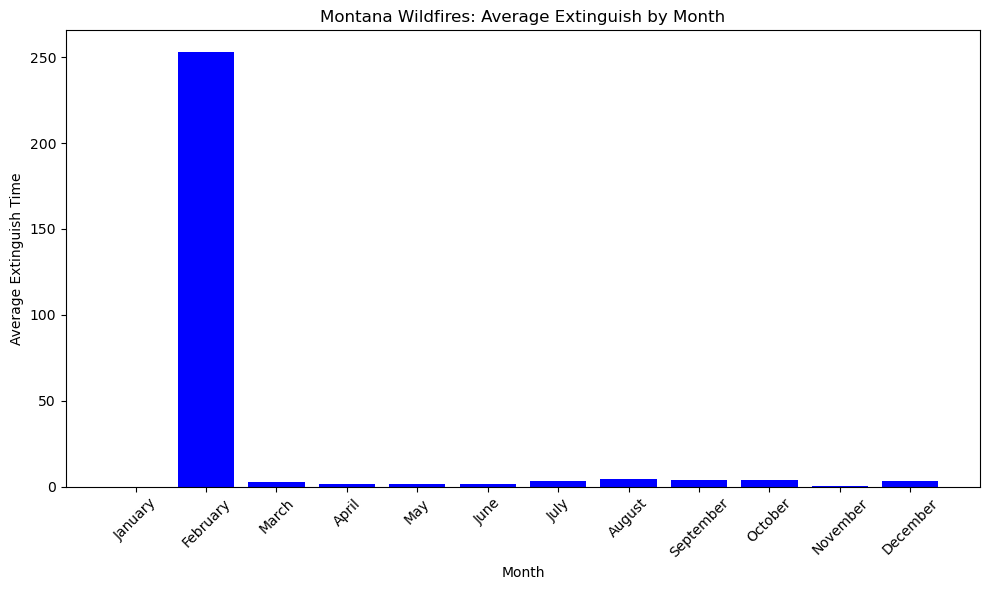

In [2]:
# Filter the data for Montana (MT) and select the necessary columns
montana_df = wildfires_df[wildfires_df["STATE"] == "MT"][["FIRE_YEAR", "Fire_Date", "Days_to_extinguish_fire"]]

# Convert the "Fire_Date" column to datetime data type
montana_df["Fire_Date"] = pd.to_datetime(montana_df["Fire_Date"])

# Calculate the total average fire extingished by month and fill missing values with 0
monthly_days_to_extinguish_fire_montana = montana_df.groupby(montana_df["Fire_Date"].dt.month)["Days_to_extinguish_fire"].mean().reindex(range(1, 13), fill_value=0)

# Define the month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, monthly_days_to_extinguish_fire_montana, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Extinguish Time')
plt.title('Montana Wildfires: Average Extinguish by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
